In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [37]:
df=pd.read_csv('/Users/kang-yumin/Desktop/DATA(입주물량 수정).csv/하남시.csv')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   날짜         170 non-null    float64
 1   평당가        170 non-null    float64
 2   연령평균       170 non-null    float64
 3   가구수        170 non-null    int64  
 4   사설학원수(개)   170 non-null    int64  
 5   학업성취도      170 non-null    float64
 6   매매회전율      170 non-null    float64
 7   미분양수       170 non-null    int64  
 8   입주물량       170 non-null    int64  
 9   강남접근성점수    170 non-null    int64  
 10  강남자가용점수    170 non-null    int64  
 11  GTX        170 non-null    int64  
 12  신도시        170 non-null    int64  
 13  LTV        170 non-null    int64  
 14  UIG        170 non-null    float64
 15  출퇴근량       170 non-null    int64  
 16  대기업수       170 non-null    int64  
 17  매수우위지수     170 non-null    float64
 18  가계대출금리     170 non-null    float64
 19  미국금리종가     170 non-null    float64
 20  epu       

In [39]:
df=df.drop(['날짜', '연령평균'], axis=1) #,'강남접근성점수'

In [40]:
#df=df.drop(['날짜','날짜.1'], axis=1)

In [41]:
## 전진 선택법
variables = df.columns[:-2].tolist() ## 설명 변수 리스트
 
y = df['평당가'] ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = df[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

/var/folders/f3/r4ccql6n3sb795h3x8l7wls80000gn/T/ipykernel_80256/50906850.py:14: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
/var/folders/f3/r4ccql6n3sb795h3x8l7wls80000gn/T/ipykernel_80256/50906850.py:14: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
/var/folders/f3/r4ccql6n3sb795h3x8l7wls80000gn/T/ipykernel_80256/50906850.py:14: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
/var/folders/f3/r4ccql6n3sb795h3x8l7wls80000gn/T/ipykernel_80256/50906850.py:14: FutureWarning: The default dtype for emp

In [42]:
selected_variables

['평당가', '입주물량', '신도시', 'epu', '미분양수', 'UIG', 'LTV']

In [33]:
df

,평당가,가구수,사설학원수(개),학업성취도,매매회전율,미분양수,입주물량,강남접근성점수,강남자가용점수,GTX,...,LTV,UIG,출퇴근량,대기업수,매수우위지수,가계대출금리,미국금리종가,epu,선도50지수,주택가격전망CSI
0,969.271775,114165,670,71.9,1.361875,2393,460,2,2,0,...,1,2.79,60596,1,59.5,6.99,3.734,74.095062,33.9,89
1,1001.949412,114459,670,71.9,1.107502,2268,460,2,2,0,...,1,2.84,60596,1,60.3,6.95,4.067,89.214928,34.3,89
2,1016.688335,114717,670,71.9,1.172074,2241,460,2,2,0,...,1,2.86,60596,1,57.1,6.93,3.975,125.871094,34.8,89
3,707.072756,114988,670,71.9,1.200446,2227,460,2,2,0,...,1,2.91,60596,1,46.2,7.12,3.958,126.503624,35.5,101
4,916.239765,115220,670,71.9,0.641803,1465,460,2,2,0,...,1,2.81,60596,1,39.4,7.35,3.825,110.481140,36.2,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,3533.559620,187628,1085,71.9,0.079795,10,279,2,2,1,...,1,4.67,102004,1,51.1,3.91,1.784,228.802427,100.0,100
166,3161.007065,187853,1085,71.9,0.082336,11,279,2,2,1,...,1,4.75,102004,1,45.2,3.93,1.822,270.153319,100.1,98
167,3064.809262,188064,1105,71.9,0.111307,16,279,2,2,1,...,1,4.90,102004,1,43.6,3.98,2.345,364.996204,100.4,105
168,3252.984266,188333,1110,71.9,0.134178,20,279,2,2,1,...,1,4.87,102004,1,43.3,4.05,2.938,333.120000,100.7,115


/Users/kang-yumin/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kang-yumin/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kang-yumin/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kang-yumin/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kang-yumin/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53748 (\N{HANGUL SYLLABLE TOE}) missin

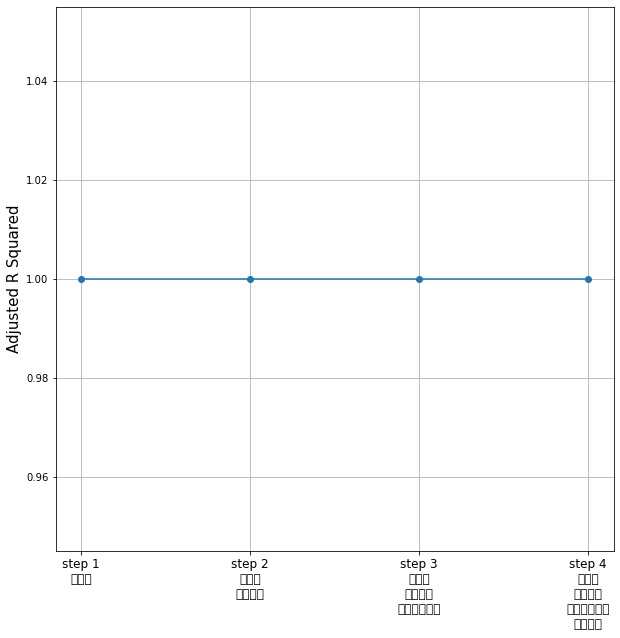

In [15]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()